## Bagging vs RandomForest

- The major difference comes in column sampling.
- In case of bagging, if we select all base estimators as decision trees, it will still not perform the same as a random forest.
- The reason is their column sampling style.
- In case of bagging, the base estimator, i.e., decision tree, will do column sampling before building. It is tree-level sampling, so before creating the tree, it will finalize which columns to be used.
- But in case of a random forest, node-level column sampling happens, i.e., before creating nodes, columns will be selected randomly.
- This is why many times the performance of a random forest is better than a bagging ensemble.
- In this notebook, we will try to analyze this difference in column sampling.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)


In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-2.734133,-0.623430,2.718230,-0.514915,1.020377,0
1,-0.313051,0.979867,0.438519,1.339866,-1.387231,1
2,-1.002335,-1.102442,0.524288,1.415932,-1.152623,0
3,-0.954900,1.617098,-0.996338,2.725601,1.848080,1
4,-0.169960,0.108977,0.151894,2.258042,-2.778837,0


## Bagging Classifier

- Here we are creating a bagging classifier and specifying that we need to do column sampling.
- Randomly, we are specifying to take 2 columns.
- Now in our tree, only those 2 columns will be seen again and again.


In [27]:
# created object
bag = BaggingClassifier(max_features=2)


In [28]:
# trained model
bag.fit(df.iloc[:,:5],df.iloc[:,-1])


BaggingClassifier(max_features=2)

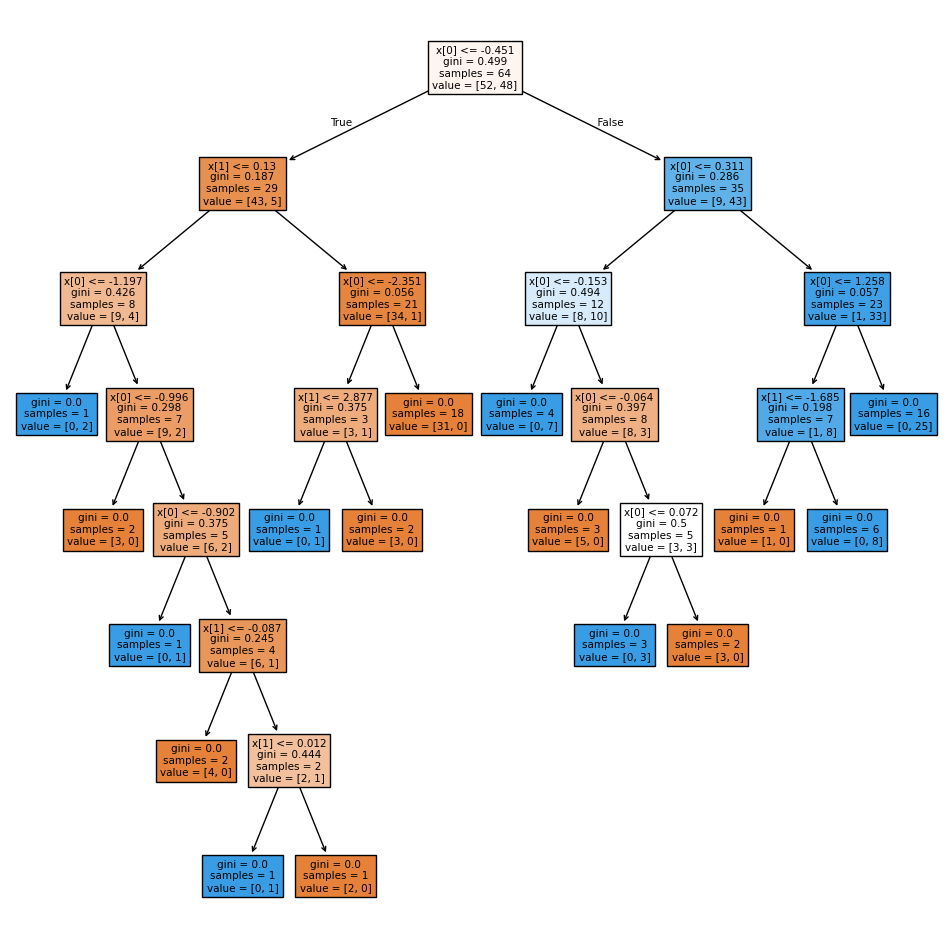

In [41]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0],filled=True)
plt.show()

In [43]:
# # Create a new figure with a specified size of 20x20 inches
# plt.figure(figsize=(20, 20))

# # Loop through each estimator in the BaggingClassifier
# for i, estimator in enumerate(bag.estimators_):
#     # Create a 5x2 grid of plots and specify the current subplot position
#     plt.subplot(5, 2, i + 1)
    
#     # Plot the decision tree with filled nodes and specified feature and class names
#     plot_tree(estimator, filled=True, feature_names=["Feature1", "Feature2"], class_names=["Class1", "Class2"])
    
#     # Set the title for the current subplot
#     plt.title(f"Estimator {i + 1}")

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Display the figure with all the subplots
# plt.show()


- We can see in the entire decision tree, if splitting has happened, it's only happening either on column 0 or 1; no other column is touched.
- So, before creating the tree, the columns were finalized, and only those columns were used in creating the whole tree.


## Random Forest

In [44]:
rf = RandomForestClassifier(max_features=2)


In [45]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])


RandomForestClassifier(max_features=2)

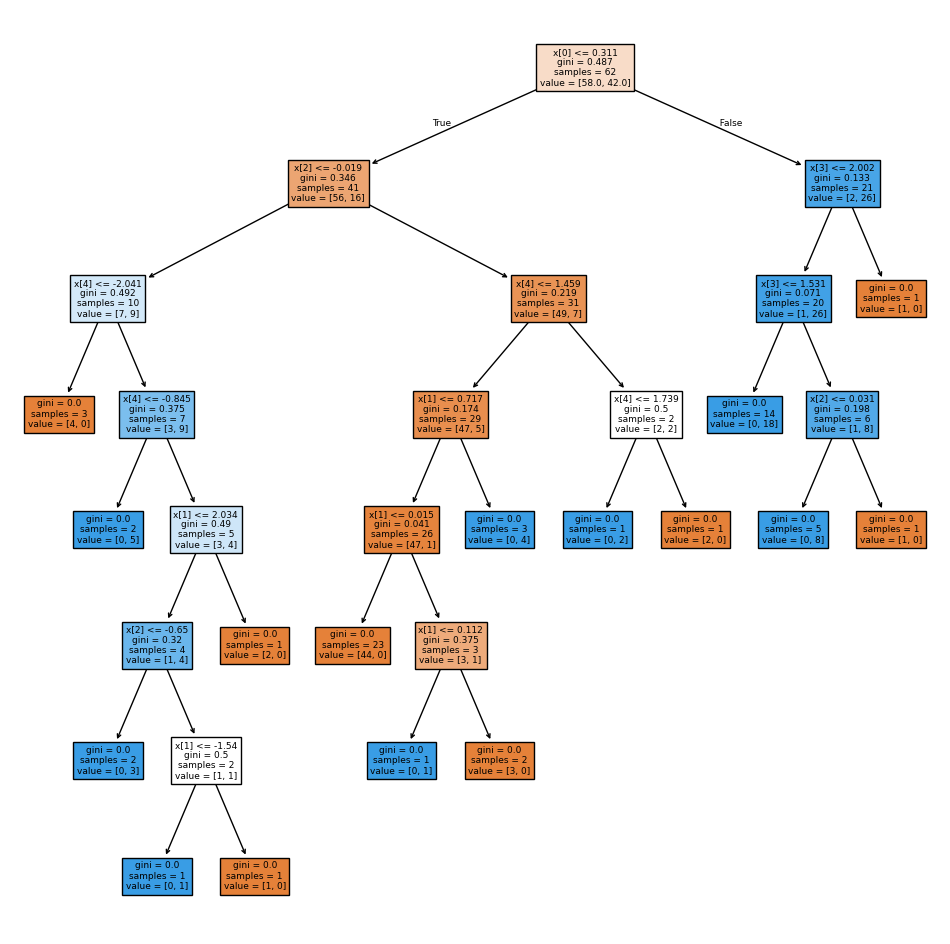

In [47]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4], filled=True)
plt.show()

- If we see here, the first splitting happened on x[0], then the left split on x[2], and the right split on x[3], so already 3 columns came.
- So, here node-level splitting happened.
- That's the reason, since there's more randomness in random forest, why the base model performs well.
